<a href="https://colab.research.google.com/github/MUHAMMADALYAN/Natural-Language-Processing-in-TensorFlow/blob/master/IMDB_subword_dataset_NLP_using_single_and_muti_LSTM_%2CConvolution_%2CGRU_with_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMDB subword dataset NLP using single and muti LSTM ,Convolution ,GRU with Embedding.

###We will use pretokenized datas for our text classification 

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4ZTRN3/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4ZTRN3/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4ZTRN3/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


#Language Processing using Singlelayer LSTM with Embedding

In [0]:
model = tf.keras.Sequential([
    # 64 dimensions
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    #sequence model Bidirectional Lstm is used  as we know sequence is important in extracting 
    #context of word so in this case it will have effect of (recurent NN +)=Lstm which keeps context of previous words
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),#64 is ouptputs from that layer but as it is now bi-directional  so 128 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 60s 153ms/step - loss: 0.5503 - accuracy: 0.7121 - val_loss: 0.4448 - val_accuracy: 0.8084
Epoch 2/10
391/391 [==============================] - 59s 151ms/step - loss: 0.4447 - accuracy: 0.7984 

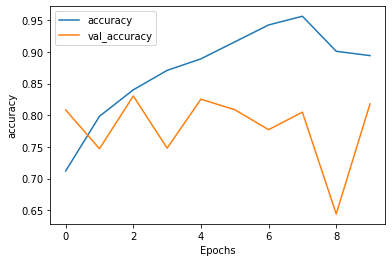

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, 'accuracy')

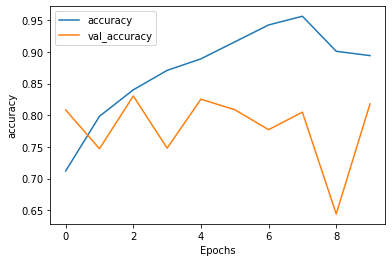

In [0]:
plot_graphs(history, 'accuracy')

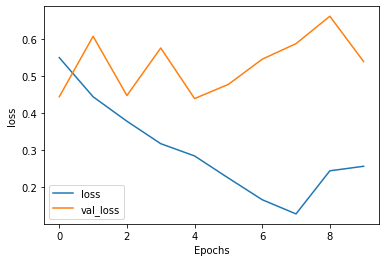

In [0]:
plot_graphs(history, 'loss')

#Language Processing using Multilayer LSTM with Embedding

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 108s 275ms/step - loss: 0.6671 - accuracy: 0.5758 - val_loss: 0.6941 - val_accuracy: 0.6004
Epoch 2/10
391/391 [==============================] - 108s 277ms/step - loss: 0.5320 - accuracy: 0.7388 - val_loss: 0.4117 - val_accuracy: 0.8157
Epoch 3/10
391/391 [==============================] - 108s 277ms/step - loss: 0.3001 - accuracy: 0.8785 - val_loss: 0.3311 - val_accuracy: 0.8608
Epoch 4/10
391/391 [==============================] - 108s 277ms/step - loss: 0.2023 - accuracy: 0.9253 - val_loss: 0.3279 - val_accuracy: 0.8734
Epoch 5/10
391/391 [==============================] - 108s 277ms/step - loss: 0.1466 - accuracy: 0.9489 - val_loss: 0.3500 - val_accuracy: 0.8715
Epoch 6/10
391/391 [==============================] - 109s 279ms/step - loss: 0.1054 - accuracy: 0.9668 - val_loss: 0.3579 - val_accuracy: 0.8732
Epoch 7/10
391/391 [==============================] - 108s 277ms/step - loss: 0.0757 - accuracy: 0.9777 - val_loss: 0.3953 -

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

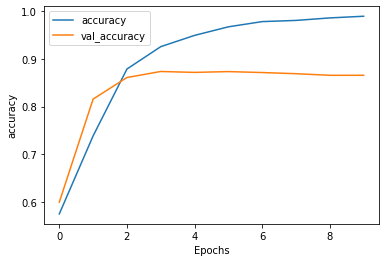

In [0]:
plot_graphs(history, 'accuracy')

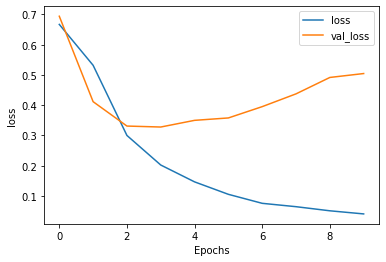

In [0]:
plot_graphs(history, 'loss')

#Language Processing using Convolution with Embedding.

In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),# 128 filters , 5 shape of filter 
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 20s 51ms/step - loss: 0.4524 - accuracy: 0.7721 - val_loss: 0.3053 - val_accuracy: 0.8747
Epoch 2/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2221 - accuracy: 0.9178 - val_loss: 0.2994 - val_accuracy: 0.8792
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 0.1717 - accuracy: 0.9375 - val_loss: 0.3212 - val_accuracy: 0.8742
Epoch 4/10
391/391 [==============================] - 13s 34ms/step - loss: 0.1395 - accuracy: 0.9508 - val_loss: 0.3483 - val_accuracy: 0.8685
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1109 - accuracy: 0.9619 - val_loss: 0.4404 - val_accuracy: 0.8581
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 0.0861 - accuracy: 0.9727 - val_loss: 0.5079 - val_accuracy: 0.8555
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 0.0709 - accuracy: 0.9772 - val_loss: 0.5394 - val_accuracy:

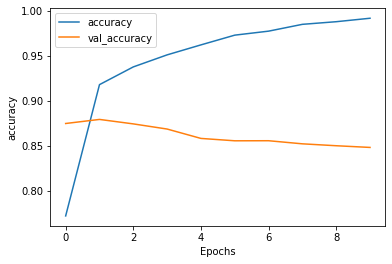

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')

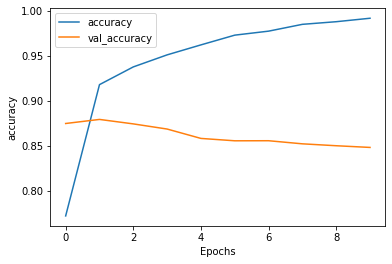

In [0]:
plot_graphs(history, 'accuracy')

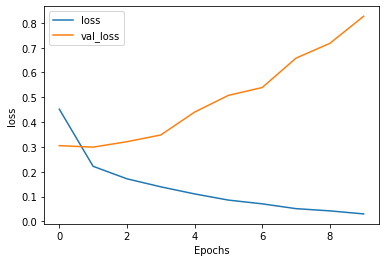

In [0]:
plot_graphs(history, 'loss')

#Language Processing using GRU with Embedding.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
num_epochs = 50
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 543,053
Trainable params: 543,053
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 57s 147ms/step - loss: 0.6387 - accuracy: 0.6428 - val_loss: 0.5759 - val_accuracy: 0.7395
Epoch 2/10
391/391 [==============================] - 56s 143ms/step - loss: 0.5197 - accuracy: 0.782

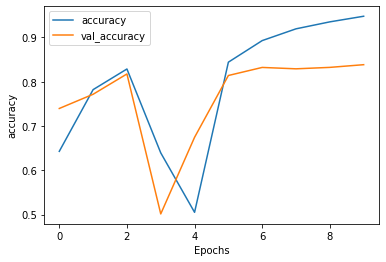

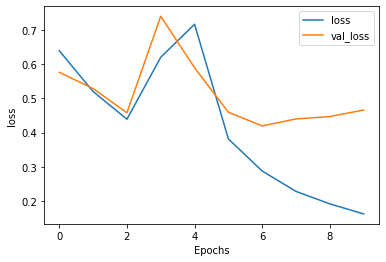

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')